<a href="https://colab.research.google.com/github/pragyasingh7/deep-learning-guide/blob/master/BTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls /content/drive/My\ Drive/binary

 C1--Trace--00301.trc	     C1--Trace--01998.trc	 C1--Trace--03686.trc
 C1--Trace--00302.trc	     C1--Trace--01999.trc	 C1--Trace--03687.trc
 C1--Trace--00303.trc	     C1--Trace--02000.trc	 C1--Trace--03688.trc
 C1--Trace--00304.trc	     C1--Trace--02001.trc	 C1--Trace--03689.trc
 C1--Trace--00305.trc	     C1--Trace--02002.trc	 C1--Trace--03690.trc
 C1--Trace--00306.trc	     C1--Trace--02003.trc	 C1--Trace--03691.trc
 C1--Trace--00307.trc	     C1--Trace--02004.trc	 C1--Trace--03692.trc
 C1--Trace--00308.trc	     C1--Trace--02005.trc	 C1--Trace--03693.trc
 C1--Trace--00309.trc	     C1--Trace--02006.trc	 C1--Trace--03694.trc
 C1--Trace--00310.trc	     C1--Trace--02007.trc	 C1--Trace--03695.trc
 C1--Trace--00311.trc	     C1--Trace--02008.trc	 C1--Trace--03696.trc
 C1--Trace--00312.trc	     C1--Trace--02009.trc	 C1--Trace--03697.trc
 C1--Trace--00313.trc	     C1--Trace--02010.trc	 C1--Trace--03698.trc
 C1--Trace--00314.trc	     C1--Trace--02011.trc	 C1--Trace--03699.trc
 C1--Trace--00315.tr

In [0]:
with open("/content/drive/My Drive/binary/C1--Trace--00306.trc", "rb") as file:
     data = file.read(8)
with open("out.txt", "w") as f:
   f.write(" ".join(map(str,data)))
   f.write("\n")

In [0]:
x = np.genfromtxt('out.txt', delimiter=',')

b'#9001000'

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = np.genfromtxt('/content/drive/My Drive/DPP/outtest2/C1--Trace--00306.trc.txt', delimiter=',')
data2 = np.genfromtxt('/content/drive/My Drive/DPP/outtest2/C1--Trace--00307.trc.txt', delimiter=',')

In [0]:
data.shape

(1000002, 2)

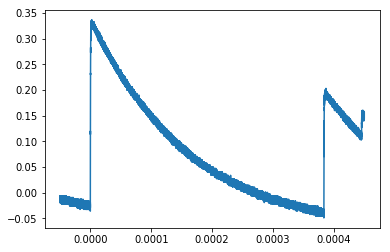

In [0]:
plt.plot(data1[:,0], data1[:, 1]*-1)

In [0]:
def moving_avg(a, x, prev):
  return (x+a*prev)/(1+a)
data1[:, 1] = data1[:, 1]*-1
h=[];
diff = []
a = 0.9
prev_y = data[0][1]
for i in data[1:, 1]:
  diff.append(abs(i-prev_y))
  if (abs(i-prev_y)>0.025):
    h.append(abs(i-prev_y))
  prev_y = i


In [0]:
def getdiff(file):
  data = np.genfromtxt(file, delimiter=',')
  data[:, 1] = data[:, 1]*-1
  t = abs(data[1:, 1]-data[:-1, 1])
  return np.array(t)
  

In [0]:
x = getdiff('/content/drive/My Drive/DPP/outtest2/C1--Trace--00306.trc.txt')
for i in range(307, 401):
  t = getdiff('/content/drive/My Drive/DPP/outtest2/C1--Trace--00{}.trc.txt'.format(i))
  x = np.concatenate((x, t), axis=0)

In [0]:
data = np.genfromtxt('/content/drive/My Drive/DPP/outtest2/C1--Trace--00306.trc.txt', delimiter=',')
data[:, 1] = data[:, 1]*-1
prev = data[0, 1]
a = 0.5; a1=0.99
l = [data[0, 1]]
for i in range(len(data[1:, 1])):
  x = data[i, 1]
  l.append((prev+a*x)/(1+a))
  prev = prev*a1+(1-a1)*x

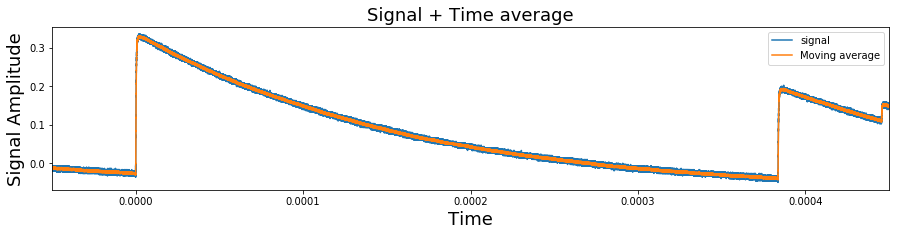

In [0]:
#plt.plot(data[:, 0], l)
#plt.plot(data[:, 0], data[:, 1])
#plt.show()
fig, ax= plt.subplots(figsize=(15, 3))
#time_ave, signal_ave = get_ave_values(time, signal, average_over)
ax.plot(data[:, 0], data[:, 1], label='signal')
ax.plot(data[:, 0], l, label='Moving average')
ax.set_xlim(data[0, 0], data[-1, 0])
ax.set_ylabel('Signal Amplitude', fontsize=18)
ax.set_title('Signal + Time average', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
ax.legend()
plt.show()

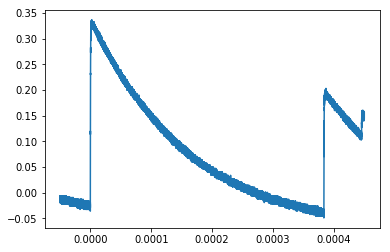

In [0]:
#x = np.concatenate((t1, t2), axis=0)
plt.plot(data[:, 0], data[:, 1])

In [0]:
#np.median(t)
t3 = t1
t3 = np.delete(t3, np.where(t3<0.014))
t3 = np.delete(t3, np.where(t3>0.019))

In [0]:
max(data[:, 1]), data[0, 1]

(0.382293, -0.0162189)

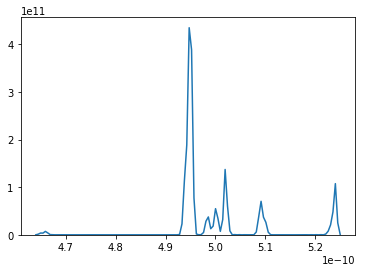

In [0]:
sns.distplot(t, hist=False)

In [0]:
## getting familiar with wavelet transform using El-nino dataset
import os
import pywt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from collections import Counter
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [0]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


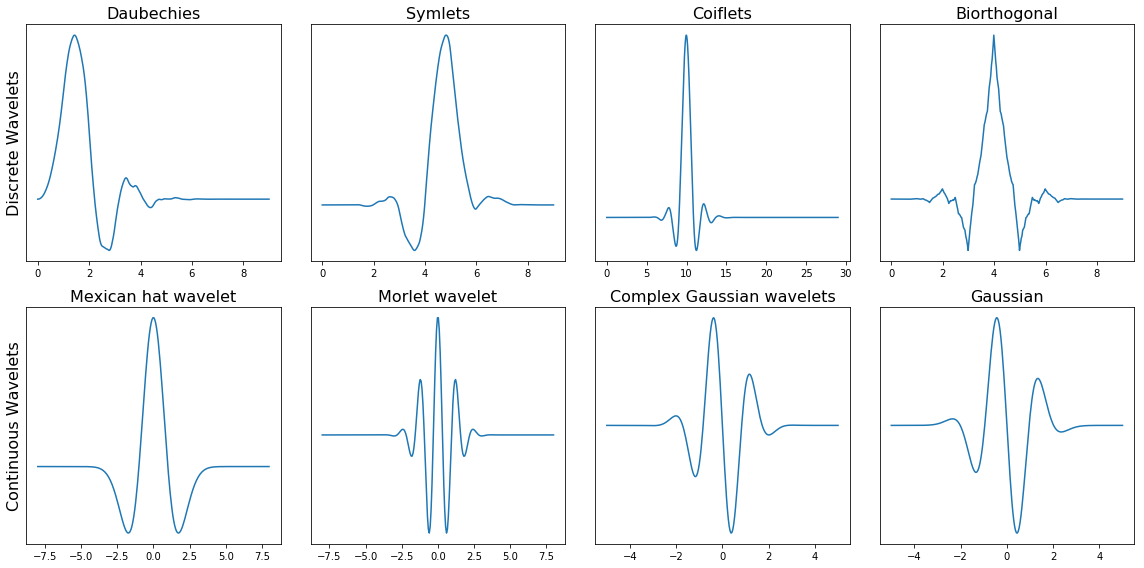

In [0]:
## Visualizing different wavelets
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 8))
for ii, list_wavelets in enumerate(list_list_wavelets):
  funcs = list_funcs[ii]
  row_no = ii
  for col_no, wavelet_name in enumerate(list_wavelets):
    wavelet = funcs(wavelet_name)
    family_name = wavelet.family_name
    biorthogonal = wavelet.biorthogonal
    orthogonal = wavelet.orthogonal
    symmetry = wavelet.symmetry
    if ii==0:
      _ = wavelet.wavefun()
      wavelet_function = _[0]
      x_values = _[-1]
    else :
      wavelet_function, x_values = wavelet.wavefun()
    if col_no==0 and ii==0:
      axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
    if col_no==0 and ii==1:
      axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
    axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
    axarr[row_no, col_no].plot(x_values, wavelet_function)
    axarr[row_no, col_no].set_yticks([])
    axarr[row_no, col_no].set_yticklabels([])
    
plt.tight_layout()
plt.show()

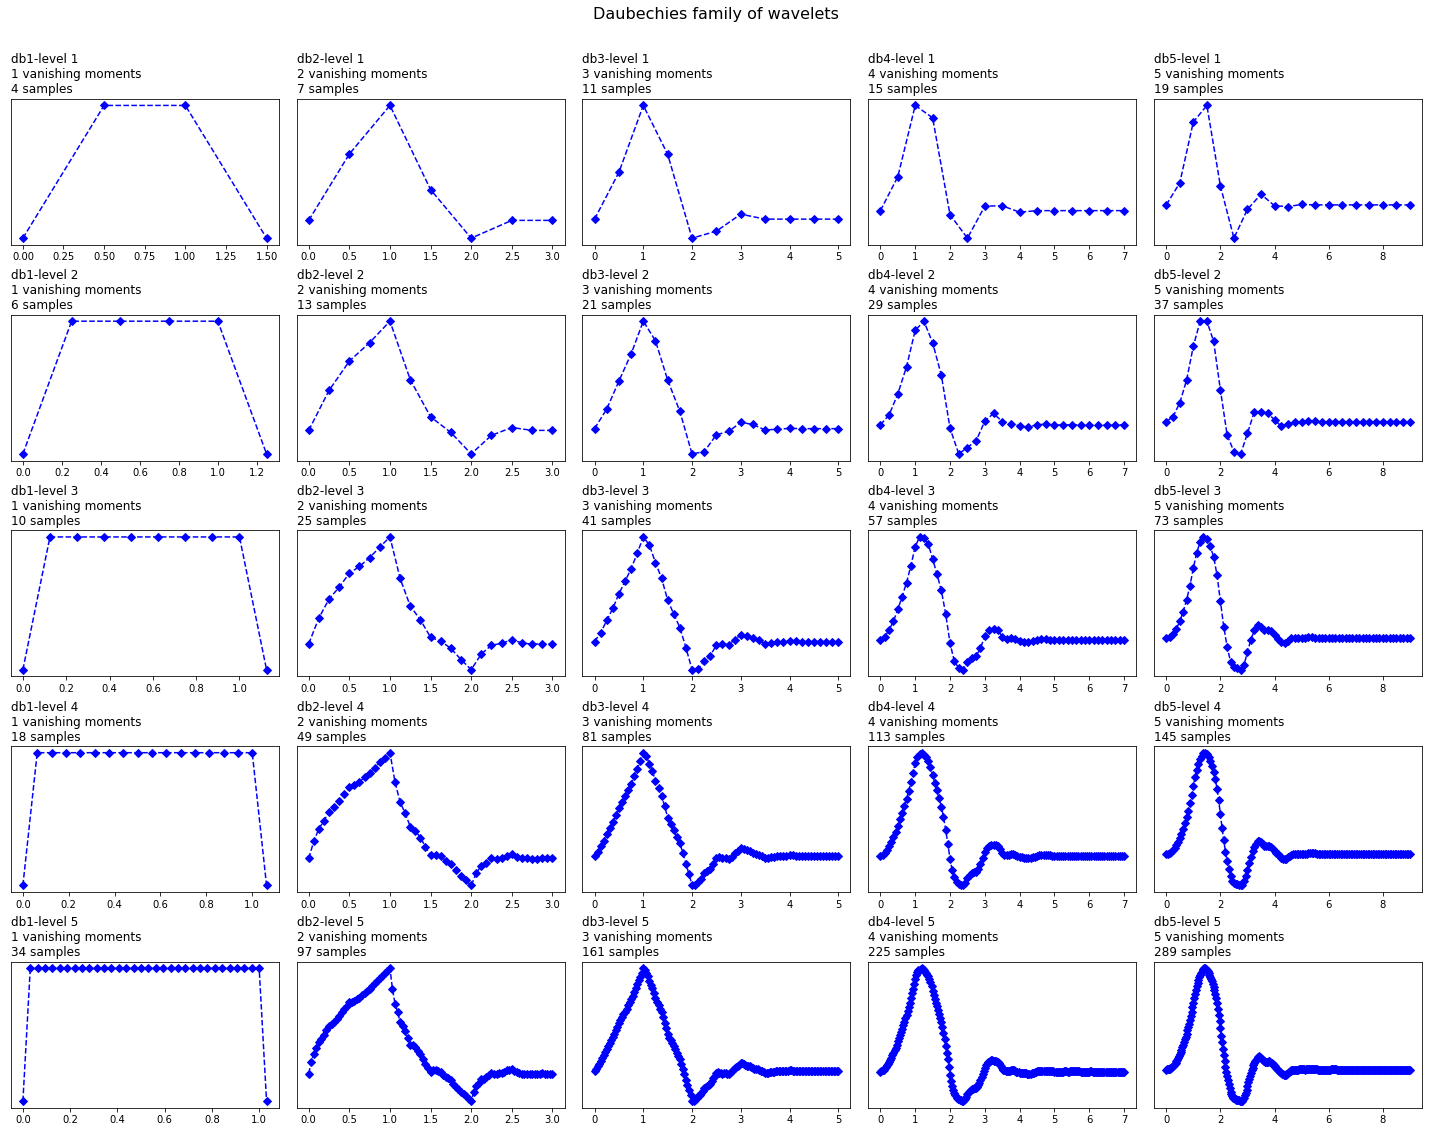

In [0]:
db_wavelets = pywt.wavelist('db')[:5]

fig, axarr = plt.subplots(nrows=5, ncols =5, figsize=(20, 16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, wavelet_name in enumerate(db_wavelets):
  wavelet = pywt.Wavelet(wavelet_name)
  no_moments = wavelet.vanishing_moments_psi
  family_name = wavelet.family_name
  for row_no, level in enumerate(range(1,6)):
    wavelet_function, scaling_function, x_values = wavelet.wavefun(level=level)
    axarr[row_no, col_no].set_title("{}-level {}\n{} vanishing moments\n{} samples".format(wavelet_name, level, no_moments, len(x_values)), loc='left')
    axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
    axarr[row_no, col_no].set_yticks([])
    axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

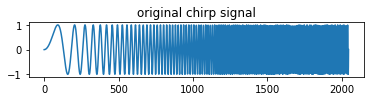

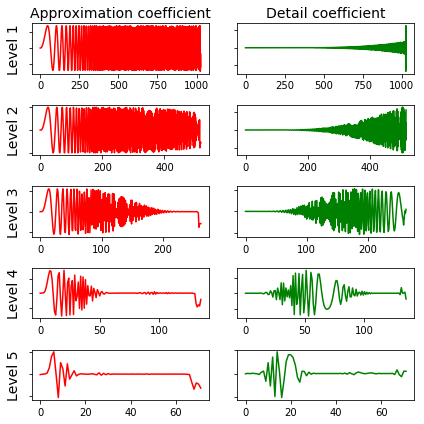

In [0]:
## expermenting with a chirp signal
x = np.linspace(0, 1, num =2048)
chirp_signal = np.sin(250*np.pi*x**2)

fig, ax  = plt.subplots(figsize=(6,1))
ax.set_title("original chirp signal")
ax.plot(chirp_signal)
plt.show()

data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6, 6))
for ii in range(5):
  (data, coeff_d) = pywt.dwt(data, waveletname)
  axarr[ii, 0].plot(data, 'r')
  axarr[ii, 1].plot(coeff_d, 'g')
  axarr[ii, 0].set_ylabel("Level {}".format(ii+1), fontsize=14, rotation=90)
  axarr[ii, 0].set_yticklabels([])
  if ii==0:
    axarr[ii, 0].set_title("Approximation coefficient", fontsize=14)
    axarr[ii, 1].set_title("Detail coefficient", fontsize=14)
  axarr[ii, 1].set_yticklabels([])
  
plt.tight_layout()
plt.show()

In [0]:
elnino = np.genfromtxt('/content/drive/My Drive/elnino.csv', delimiter=',')

In [0]:
# load the el-nino dataset
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_csv(dataset, sep='\t')
N = df_nino.shape[0]
t0 = 1871
dt = 0.25
time = np.arange(0, N)*dt + t0
signal = df_nino.values.squeeze()

In [0]:
data = np.genfromtxt('/content/drive/My Drive/DPP/outtest2/C1--Trace--00306.trc.txt', delimiter=',')
signal = data[:, 1]*-1
time = data[:, 0]

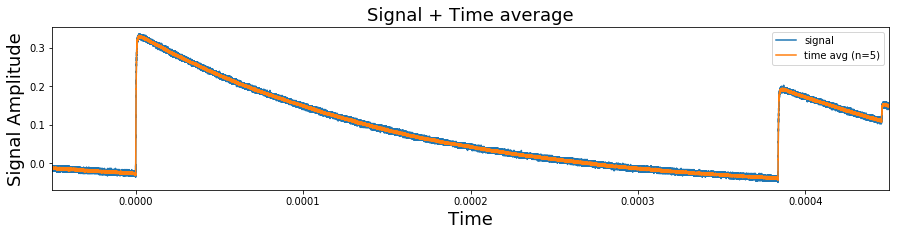

In [0]:
# plotting data along with average

def get_ave_values(x_values, y_values, n=5):
  signal_len = len(x_values)
  if signal_len%n==0:
    padding_len = 0
  else :
    padding_len = n-signal//n%n
  xarr = np.array(x_values)
  yarr = np.array(y_values)
  xarr.resize(signal_len//n, n)
  yarr.resize(signal_len//n, n)
  xarr_reshaped = xarr.reshape((-1, n))
  yarr_reshaped = yarr.reshape((-1, n))
  x_ave = xarr_reshaped[:, 0]
  y_ave = np.nanmean(yarr_reshaped, axis=1)
  return x_ave, y_ave

def plot_signal_plus_average(time, signal, average_over=5):
  fig, ax= plt.subplots(figsize=(15, 3))
  time_ave, signal_ave = get_ave_values(time, signal, average_over)
  ax.plot(time, signal, label='signal')
  ax.plot(time_ave, signal_ave, label='time avg (n={})'.format(average_over))
  ax.set_xlim(time[0], time[-1])
  ax.set_ylabel('Signal Amplitude', fontsize=18)
  ax.set_title('Signal + Time average', fontsize=18)
  ax.set_xlabel('Time', fontsize=18)
  ax.legend()
  plt.show()
  
plot_signal_plus_average(time, signal)

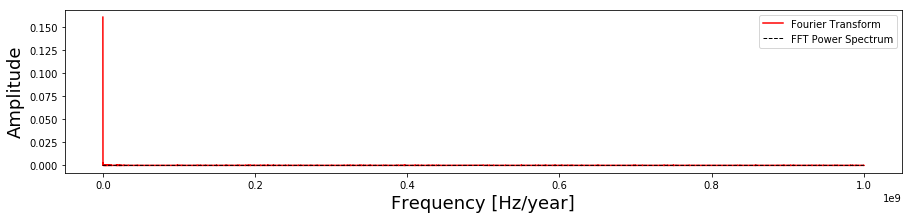

In [0]:
# plotting fourier transform of the data
def get_fft_values(y_values, T, N, f_s):
  f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
  fft_values_ = fft(y_values)
  fft_values = 2.0/N*np.abs(fft_values_[0:N//2])
  return f_values, fft_values

def plot_fft_plus_power(time, signal):
  dt = time[1]-time[0]
  N=len(signal)
  fs = 1/dt
  
  fig, ax= plt.subplots(figsize=(15, 3))
  variance = np.std(signal)**2
  f_values, fft_values = get_fft_values(signal, dt, N, fs)
  fft_power = variance*abs(fft_values)**2
  ax.plot(f_values, fft_values, 'r-', label = 'Fourier Transform')
  ax.plot(f_values, fft_power, 'k--', linewidth=1, label = 'FFT Power Spectrum')
  ax.set_xlabel('Frequency [Hz/year]', fontsize=18)
  ax.set_ylabel('Amplitude', fontsize=18)
  ax.legend()
  plt.show()

plot_fft_plus_power(time, signal)

/usr/local/lib/python3.6/dist-packages/pywt/_cwt.py:74: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':


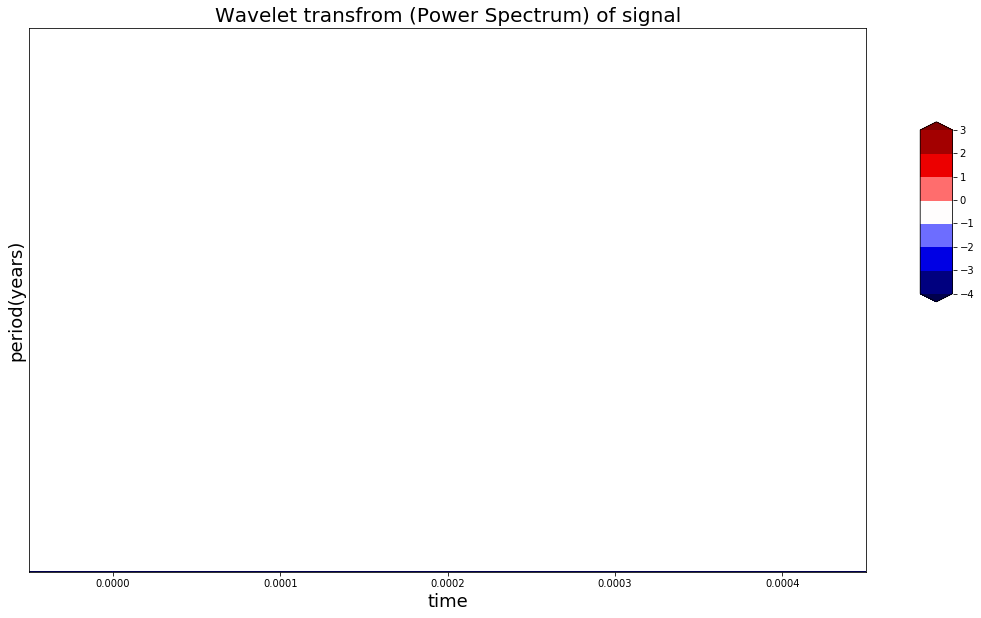

In [0]:
# plot scaleogram using Continuous wavelet Transform
def plot_wavelet(time, signal, scales, waveletname='cmor',
                 cmap=plt.cm.seismic, title='Wavelet transfrom (Power Spectrum) of signal',
                 ylabel = 'period(years)', xlabel='time'):
  dt = time[1]-time[0]
  [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
  power = (abs(coefficients))**2
  period = 1./frequencies
  levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
  contourlevels = np.log2(levels)
  
  fig, ax = plt.subplots(figsize=(15, 10))
  im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both', cmap=cmap)
  
  ax.set_title(title, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=18)
  ax.set_xlabel(xlabel, fontsize=18)
  
  yticks = 2**(np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max()))))
  ax.set_yticks(np.log2(yticks))
  ax.set_yticklabels(yticks)
  ax.invert_yaxis()
  ylim = ax.get_ylim()
  ax.set_ylim(ylim[0], -1)
               
  cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
  fig.colorbar(im, cax = cbar_ax, orientation='vertical')
  plt.show()


scales = np.arange(1, 128)
plot_wavelet(time, signal, scales)

In [0]:
import scipy.io as sio
from IPython.display import display
import scipy.stats
import datetime as dt
from collections import defaultdict

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier

In [0]:
dict_classifier = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier,
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "K-Nearest": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB(),
    "Gaussian Process": GaussianProcessClassifier(),
}

def batch_classify(X_train, Y_train, X_test, Y_test, no_classifier=5, verbose=True):
  dict_models={}
  for classifier_name, classifier in list(dict_classifier.items())[:no_classifier]:
    t_start = time.clock()
    classifier.fit(X_train, Y_train)
    t_end = time.clock()
    
    t_diff = t_end-t_start
    train_score = classifier.score(X_train, Y_train)
    test_score = classifier.score(X_test, Y_test)
    
    dict_model[classifier_name] = {'model':classifier,
                                   'train_score': train_score, 
                                   'test_score': test_score,
                                   'train time': t_diff}
    if verbose:
      print('Trained {c} in {f:.2f} s'.format(c=classifier_name, f=t_diff))
  return dict_model
  
def get_train_test(df, y_cols, x_cols, ratio):
  mask = np.random.rand(len(df))<ratio
  df_train = df[mask]
  df_test = df[~mask]
  
  Y_train = df_train[y_cols].values
  X_train = df_train[x_cols].values
  Y_test = df_test[y_cols].values
  X_test = df_test[x_cols].values
  
  return df_train, df_test, Y_train, X_train, Y_test, X_test

def display_dict_models(dict_model, sort_by='test_score'):
  clf = [key for key in dict_model.keys()]
  test_s = [dict_model[key]['test_score'] for key in clf]
  train_s = [dict_model[key]['train_score'] for key in clf]
  train_t = [dict_model[key]['train time'] for key in clf]
  
  df_ = pd.DataFrame(np.zeros(shape=(len(clf), 4)), columns=['classifier', 'test_score', 'train_score', 'train_time'])
  for ii in range(0, len(cls)):
    df_[ii, 'classifier'] = cls[ii]
    df_[ii, 'test_score'] = test_s[ii]
    df_[ii, 'train_score'] = train_s[ii]
    df_[ii, 'train_time'] = train_t[ii]
    
  display(df_.sort_values(by=sort_by, ascending=False))
  
def get_entropy(list_values):
  counter_values = Counter(list_values).most_common()
  prob = [elem[1]/len(list_values) for elem in counter_values]
  entropy = scipy.stats.entropy(prob)
  return entropy

def calculate_statistics(list_values):
  n5 = np.nanpercentile(list_values, 5)
  n25 = np.nanpercentile(list_values, 25)
  median = np.nanpercentile(list_values, 50)
  n75 = np.nanpercentile(list_values, 75)
  n95 = np.nanpercentile(list_values, 95)
  mean = np.nanmean(list_values)
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  rms = np.nanmean(np.sqrt(list_values**2))
  return [n5, n25, n75, median, mean , std, var, rms]

def calculate_crossings(list_values):
  zero_crossing_indices = np.nonzero(np.diff(np.array(list_values)>0))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.nonzero(np.diff(bp.array(list_values)>np.nanmean(list_values)))[0]
  no_mean_crossings = len(mena_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]

def get_features(list_values):
  entropy = get_entropy(list_values)
  no_crossings = calculate_crossings(list_values)
  statistics = calculate_statistics(list_values)
  return [entropy]+no_crossings+statistics

def get_uci_har_features(dataset, labels, waveletname):
  uci_har_features = []
  for signal_no in range(0, len(dataset)):
    features = []
    for signal_comp in range(0, dataset.shape[2]):
      signal = dataset[signal_no, :, signal_comp]
      list_coeff = pywt.wavedec(signal, waveletname)
      for coeff in list_coeff:
        features+=get_features(coeff)
    uci_har_features.append(features)
  X = np.array(uci_har_features)
  Y = np.array(labels)
  return X, Y

In [0]:
# loading the UCI_HAR Dataset
activities_description = {
    1:'walking',
    2:'walking upstairs',
    3:'walking downstairs',
    4:'sitting',
    5:'standing',
    6:'lying'
}
def read_signal(filename):
  with open(filename, 'r') as f:
    data = f.read().splitlines()
    data = map(lambda x: x.rstrip().lstrip().split(), data)
    data = [list(map(float, line)) for line in data]
  return data

def read_labels(filename):
  with open(filename, 'r') as f:
    activities = f.read().splitlines()
    activities = list(map(int, activities))
  return activities

def randomize(dataset, labels):
  perm = np.random.permutations(labels.shape[0])
  shuffled_dataset = dataset[perm, :, :]
  shuffled_labels = labels[perm]
  return shuffled_dataset, shuffled_labels

INPUT_FOLDER_TRAIN = './data/UCI_HAR/train/InertialSignals/'
INPUT_FOLDER_TEST = './data/UCI_HAR/test/InertialSignals/'

INPUT_FILES_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

INPUT_FILES_TEST = ['body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

LABELFILE_TRAIN = './data/UCI_HAR/train/y_train.txt'
LABELFILE_TEST = './data/UCI_HAR/test/y_test.txt'

train_signals, test_signals = [], []

for input_file in INPUT_FILES_TRAIN:
  signal = read_signal(INPUT_FOLDER_TRAIN+input_file)
  train_signals.append(signal)
tarin_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in INPUT_FILES_TEST:
  signal = read_signal(INPUT_FOLDER_TEST+input_file)
  test_signals.append(signal)
test_signals = np.transpose(np.array(test_signals), (1, 2, 0))

train_labels = read_labels(LABELFILE_TRAIN)
test_labels = read_labels(LABELFILE_TEST)

[no_signals_train, no_steps_train, no_components_train] = train_signals.shape
[no_signals_test, no_steps_test, no_components_test] = test_signals.shape
no_labels = len(np.unique(train_labels[:]))

print('The train dataset contains {} signals, each one of length {} and {} components'.format(no_signals_train, no_steps_train, no_components_train))
print('The test dataset contains {} signals, each of length {} and {} components'.format(no_signals_test, no_steps_test, no_components_test))
print('The train dataset contains {} labels with the following distribution \n{}'.format(np.shape(train_labels)[0], Counter(train_labels[:])))
print('The test dataset contains {} labels with the following distribution \n{}'.format(np.shape(test_labels)[0], Counter(test_labels[:])))

uci_har_train_signals, uci_har_train_labels = randomize(train_signals, np.array(train_labels))
uci_har_test_signals, uci_har_test_labels = randomize(test_signals, np.array(test_labels))

FileNotFoundError: ignored

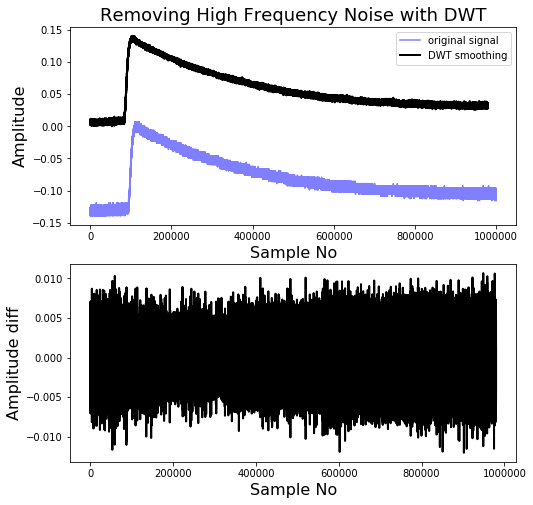

In [0]:
# removing high frequency noise
signal = np.genfromtxt('/content/drive/My Drive/DPP/outtest2/C1--Trace--00317.trc.txt', delimiter=',')
signal = signal[:, 1]*-1

def lowpassfilter(signal, thres = 0.64, wavelet='db4'):
  thres = thres*np.nanmax(signal)
  coeff = pywt.wavedec(signal, wavelet, mode='per')
  coeff[1:] = (pywt.threshold(i, value=thres, mode='soft') for i in coeff[1:])
  reconstructed_signal = pywt.waverec(coeff, wavelet, mode='per')
  return reconstructed_signal

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(8, 8))
ax[0].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4, 'coif4')[10000:-10000]
rec_mod = rec-min(rec)
diff = rec_mod[1:]-rec_mod[:-1]
ax[0].plot(rec_mod, 'k', label='DWT smoothing', linewidth=2)
ax[0].legend()
ax[1].plot(diff, 'k', label='Height difference', linewidth=2)
ax[0].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[0].set_ylabel('Amplitude', fontsize=16)
ax[1].set_ylabel('Amplitude diff', fontsize=16)
ax[0].set_xlabel('Sample No', fontsize=16)
ax[1].set_xlabel('Sample No', fontsize=16)
plt.show()

In [0]:
a = (np.max(diff)+abs(np.min(diff)))*0.5
peaks = np.where(diff>a)[0]
len(peaks)
prev = peaks[0]
peaks_mod = [peaks[0]]
for i in range(1, len(peaks)):
  if (peaks[i]-peaks[i-1]>200000):
    peaks_mod.append(peaks[i])
len(peaks_mod)

2

In [0]:
def find_peaks(diff):
  thre = (np.max(diff)+np.abs(np.min(diff)))*0.5
  peaks = np.where(diff>thre)[0]
  peaks_mod = [peaks[0]]  # cluster the time values to get distinct peaks
  for i in range(1, len(peaks)):
    if (peaks[i]-peaks[i-1]>200000):
      peaks_mod.append(peaks[i])
  return peaks_mod

def get_window(signal, peaks, window_sz=200000):
  cropped_signals=[]
  n = len(signal)
  for i in peaks:
      sig = signal[max(0, i-window_sz):min(n, i+window_sz)]
      cropped_signals.append(sig)
  return cropped_signals

In [0]:
def maxSubArraySum(a,size): 
    maxint = 10.0   
    max_so_far = -maxint - 1
    max_ending_here = 0
       
    for i in range(0, size): 
        max_ending_here = max_ending_here + a[i] 
        if (max_so_far < max_ending_here): 
            max_so_far = max_ending_here
  
        if max_ending_here < 0: 
            max_ending_here = 0   
    return max_so_far 

In [0]:
t = maxSubArraySum(diff, diff.shape[0])

In [0]:
heights = []
for i in range(306, 401):
  signal = np.genfromtxt('/content/drive/My Drive/DPP/outtest2/C1--Trace--00{}.trc.txt'.format(i), delimiter=',')
  signal = signal[:, 1]*-1
  rec = lowpassfilter(signal, 0.4)[10000:-10000]  ## cropping signal to remove edge effect
  rec_mod = rec-min(rec)
  diff = rec_mod[1:]-rec_mod[:-1]
  peaks = find_peaks(diff)
  cropped_signals = get_window(diff, peaks)
  for sig in cropped_signals:
    t = maxSubArraySum(sig, sig.shape[0])
    heights.append(t)

IndexError: ignored

In [0]:
i

317

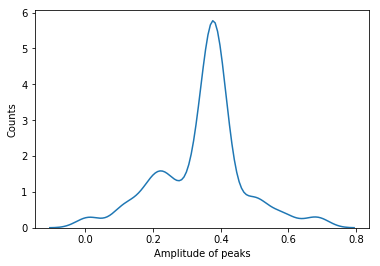

In [0]:
ax = sns.distplot(heights, hist=False)
ax.set_ylabel('Counts')
ax.set_xlabel('Amplitude of peaks')
plt.show()

In [0]:
t

0.3589674964623943